<a href="https://colab.research.google.com/github/Ivan-Childress/medical-conversation-classification/blob/main/Group_Project_(Ivan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Version Control

This notebook is maintained in a GitHub repository for professional version control and collaboration.

Repository: [medical-conversation-classification](https://github.com/Ivan-Childress/medical-conversation-classification)  
Author: Ivan Childress (ivan.childress.ds@gmail.com)

# Medical Conversation Classification Project
## Data Loading and Initial Exploration

This notebook implements a text classification model for medical conversations based on the Social Support Theory framework. We'll classify physician statements into categories of Informational Support and Emotional Support.

### Mount Google Drive and Set Up Environment

In [2]:
# Mount Google Drive to access our dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Comprehensive Data Analysis on Medical Conversations

## Overview
This section of the notebook covers the full workflow from data importation to preliminary data analysis, focusing on a medical conversations dataset. We start by importing necessary libraries, loading the dataset, examining its structure, and conducting basic text analysis.

## Step-by-Step Breakdown:
1. **Import Libraries**: Load essential Python libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`) for data manipulation and visualization.
2. **Load Dataset**: The dataset is loaded from an Excel file located on Google Drive. Ensure the file path is correctly set to where your dataset is stored.
3. **Examine Data**: Display the shape and column info of the dataset to understand the structure and types of data included. Also, visualize the first few rows to get a practical glimpse of the dataset content.
4. **Label Distribution**: Analyze the distribution of categories within the data which helps in understanding how balanced the dataset is.
5. **Visualization**: Utilize `matplotlib` and `seaborn` to visualize the distribution of support categories which can illustrate prevalent trends or imbalances.
6. **Text Analysis**: Perform basic text analysis to calculate and visualize text length and word count. This can provide insights into the complexity and diversity of the textual data.

## Practical Application:
The given code effectively sets up the environment for analyzing medical conversations, identifies key statistical attributes of the dataset, and provides visual insights into the data’s categorical and textual characteristics. This foundational analysis is critical for subsequent detailed examinations and model building.


Dataset Shape: (4030, 2)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4030 entries, 0 to 4029
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4030 non-null   object
 1   Label     4030 non-null   object
dtypes: object(2)
memory usage: 63.1+ KB

Sample Data:


,Sentence,Label
0,"Hello,",GREET
1,the rubella virus IgM was detected at around ...,REPEAT
2,which has a 50% chance of causing intrauterine...,DIAGNOISE
3,Intrauterine infection can lead to risks such ...,EXPLAIN
4,Please note that these risks may or may not oc...,EXPLAIN



Label Distribution:
Label
TREAT                  1188
EXPLAIN                1061
DIAGNOISE               381
QUES                    267
REFERRAL                222
THANK                   145
WAIT                    139
GREET                   120
RECEIVE                 110
REPEAT                   86
CONSOLE                  78
REMIND                   78
WISH                     64
REQUEST_INFORMATION      55
FUTURE_SUPPORT           36
Name: count, dtype: int64


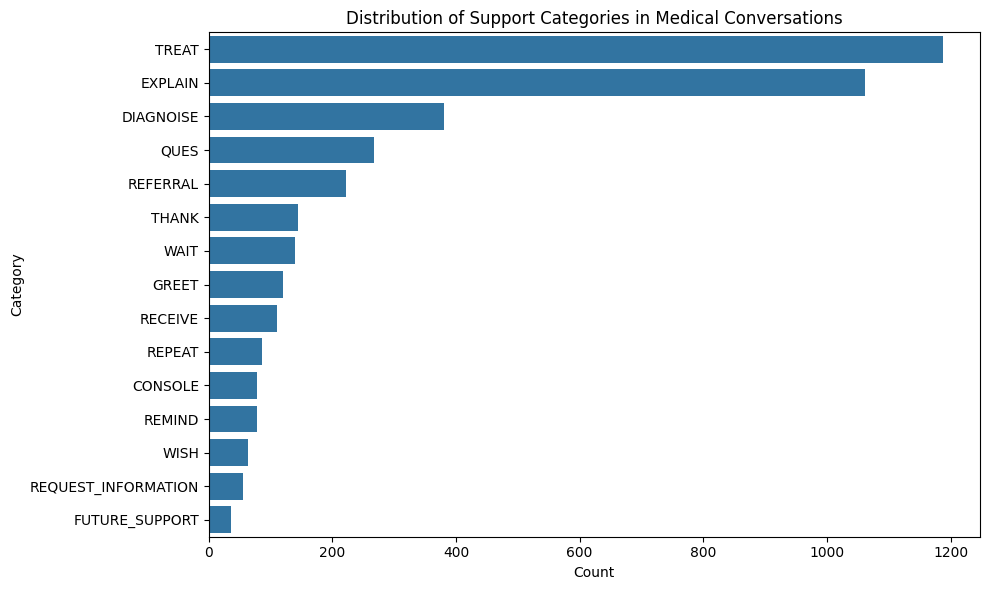


Text Length Statistics:
count    4030.000000
mean       89.232506
std        53.030637
min         6.000000
25%        51.000000
50%        81.000000
75%       117.000000
max       615.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    4030.000000
mean       15.057072
std         8.675972
min         1.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       109.000000
Name: word_count, dtype: float64


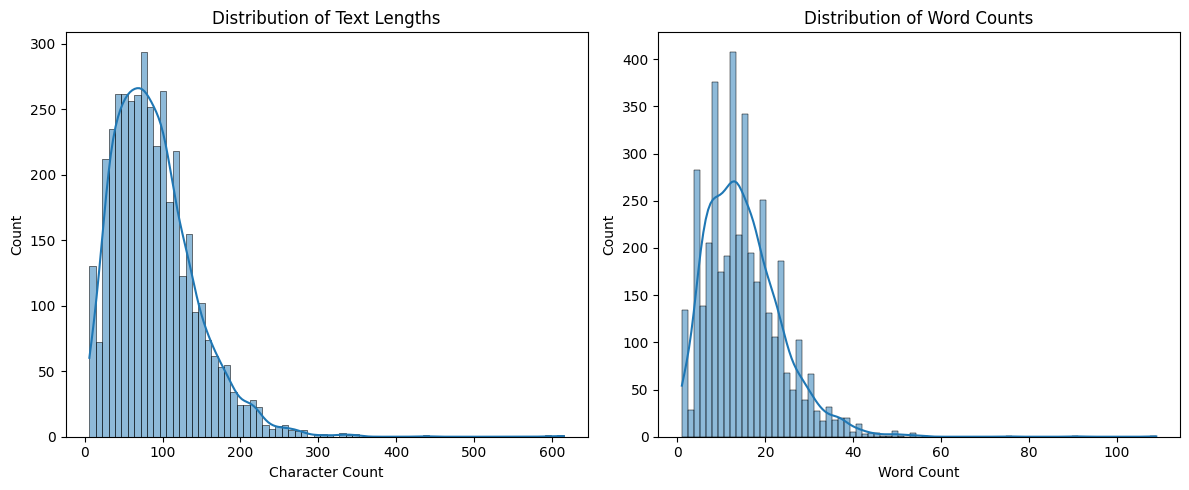

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
MC = pd.read_excel('/content/drive/My Drive/INFO 617/DATASETS/INFO 617 Group Project Train Val.xlsx') # Adjust the path to where your dataset is in your drive

# Display basic information about the dataset
print("Dataset Shape:", MC.shape)
print("\nColumn Information:")
MC.info()

# Display first few rows
print("\nSample Data:")
display(MC.head())

# Calculate and visualize label distribution
print("\nLabel Distribution:")
label_counts = MC.iloc[:, 1].value_counts()
print(label_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=MC.iloc[:, 1], order=label_counts.index)
plt.title('Distribution of Support Categories in Medical Conversations')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Basic text analysis
print("\nText Length Statistics:")
MC['text_length'] = MC.iloc[:, 0].apply(len)
print(MC['text_length'].describe())

# Word count analysis
MC['word_count'] = MC.iloc[:, 0].apply(lambda x: len(str(x).split()))
print("\nWord Count Statistics:")
print(MC['word_count'].describe())

# Visualize text length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(MC['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Character Count')

plt.subplot(1, 2, 2)
sns.histplot(MC['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.tight_layout()
plt.show()

# Text Preprocessing for Medical Text Analysis

## Overview
This section focuses on preparing the medical text data for further analysis. The text preprocessing steps involve cleaning, tokenizing, and removing stopwords using the `nltk` library, a popular tool for text manipulation in Python.

## Step-by-Step Breakdown:
1. **Import Libraries**: Import necessary Python libraries and modules such as `re` for regular expressions, and `nltk` for natural language processing tasks.
2. **Download NLTK Resources**: Ensure that relevant `nltk` resources are available. This includes `punkt` for tokenizing sentences and `stopwords` to filter out common words that may not contribute significantly to text analysis.

## Practical Application:
Text preprocessing is a critical step in natural language processing (NLP), especially when dealing with medical texts. It involves setting up the textual data by removing unnecessary or redundant elements and breaking down text into manageable and analyzable parts. By performing these steps, we lay the groundwork for more advanced analyses like sentiment analysis, topic modeling, or machine learning-based text classification.


In [4]:
# Text Preprocessing for Medical Text
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Advanced Text Preprocessing Function

## Overview
This section defines a function, `preprocess_medical_text`, designed to clean and standardize medical text data within the dataset. The function includes handling of medical abbreviations, normalization of text case, and cleaning of special characters, ensuring that the text is primed for detailed analysis.

## Step-by-Step Breakdown:
1. **Function Definition**: Define `preprocess_medical_text` which takes a single text input.
   - **Handle NaN Values**: Convert inputs to string to prevent errors from non-string data.
   - **Identify Medical Abbreviations**: Use regular expressions to find all capitalized words of 2 to 5 letters length, typical for medical abbreviations.
   - **Normalize and Clean Text**: The text is converted to lowercase to standardize it, although placeholders are used temporarily to preserve the original case of medical abbreviations.
   - **Clean Special Characters**: Remove all special characters except for a few that are significant in medical texts (e.g., `+`, `/`, `%`, `-`, `.`).
   - **Whitespace Management**: Extra spaces are removed to clean up the text format.
2. **Apply Preprocessing**: The `preprocess_medical_text` function is applied to the 'Sentence' column of the dataset, creating a new column for processed text.
3. **Display Processed Text**: Sample original and processed texts are displayed to illustrate the effects of the preprocessing steps.

## Practical Application:
By preprocessing the text, we make the dataset more uniform and easier to analyze, reducing the noise and variability introduced by formatting differences and special characters. This process is essential for subsequent natural language processing tasks, such as feature extraction and machine learning modeling, particularly in the context of medical data where consistency in terminology and format is crucial.


In [5]:
def preprocess_medical_text(text):
    # Convert to string and handle NaN values
    text = str(text)

    # Find and store medical abbreviations (capitalized words 2-5 letters)
    med_abbrevs = re.findall(r'\b[A-Z]{2,5}\b', text)

    # Replace abbreviations with placeholders
    for i, abbr in enumerate(med_abbrevs):
        text = text.replace(abbr, f'MEDABBR{i}')

    # Convert to lowercase
    text = text.lower()

    # Replace placeholders with original abbreviations
    for i, abbr in enumerate(med_abbrevs):
        text = text.replace(f'medabbr{i}', abbr)

    # Remove special characters but keep medical symbols
    text = re.sub(r'[^\w\s+/%\-\.]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply preprocessing to the dataset
MC['processed_text'] = MC['Sentence'].apply(preprocess_medical_text)

# Display sample of original and processed text for comparison
print("Original vs Processed Text Samples:")
for i in range(3):
    print(f"\nExample {i+1}:")
    print(f"Original: {MC['Sentence'].iloc[i]}")
    print(f"Processed: {MC['processed_text'].iloc[i]}")

Original vs Processed Text Samples:

Example 1:
Original: Hello,
Processed: hello

Example 2:
Original:  the rubella virus IgM was detected at around 12 weeks,
Processed: the rubella virus igm was detected at around 12 weeks

Example 3:
Original: which has a 50% chance of causing intrauterine infection.
Processed: which has a 50% chance of causing intrauterine infection.


# Data Preparation for Model Training

## Overview
This section prepares the dataset for machine learning by encoding categorical labels into numerical format and splitting the data into training and validation sets. This process is crucial for training and validating the model effectively.

## Step-by-Step Breakdown:
1. **Import Libraries**: Import `train_test_split` from `sklearn.model_selection` for data division, and `LabelEncoder` from `sklearn.preprocessing` for encoding categorical labels into numerical values.
2. **Encode Labels**: Use `LabelEncoder` to transform the text labels into a numerical format. This transformation is necessary for machine learning models that require numerical input.
   - **Store Mapping**: Create and store a mapping of original labels to their encoded values for reference.
3. **Data Splitting**: Use `train_test_split` to divide the data into training and validation sets, maintaining an 80/20 split. The stratification parameter is set to ensure that both sets have balanced class distributions, which is crucial for training unbiased models.
4. **Display Data Split Information**: Output the sizes of the training and validation sets to verify the split, along with the label mapping to ensure labels are correctly encoded.
5. **Check Class Distribution**: Display the class distribution in both training and validation sets to check for any imbalances that might affect model performance.

## Practical Application:
The encoding of labels and the stratified split of the dataset are essential steps in preparing the data for modeling. They ensure that the model learns to generalize from a balanced representation of all classes in the data. This setup helps in developing robust models that perform well on unseen data, which is particularly important in medical settings where accuracy and reliability are critical.


In [6]:
# Import necessary libraries for data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels into numerical format
label_encoder = LabelEncoder()
MC['label_encoded'] = label_encoder.fit_transform(MC['Label'])

# Store the mapping for future reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Split the data into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(
    MC['processed_text'],
    MC['label_encoded'],
    test_size=0.2,
    random_state=42,
    stratify=MC['label_encoded']  # Ensure balanced classes in both sets
)

# Display data split information
print(f"Training set size: {len(X_train)} samples")
print(f"Validation set size: {len(X_val)} samples")
print("\nLabel mapping:")
for label, code in sorted(label_mapping.items(), key=lambda x: x[1]):
    print(f"{code}: {label}")

# Check class distribution in training and validation sets
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nValidation set class distribution:")
print(pd.Series(y_val).value_counts().sort_index())

Training set size: 3224 samples
Validation set size: 806 samples

Label mapping:
0: CONSOLE
1: DIAGNOISE
2: EXPLAIN
3: FUTURE_SUPPORT
4: GREET
5: QUES
6: RECEIVE
7: REFERRAL
8: REMIND
9: REPEAT
10: REQUEST_INFORMATION
11: THANK
12: TREAT
13: WAIT
14: WISH

Training set class distribution:
label_encoded
0      62
1     305
2     849
3      29
4      96
5     214
6      88
7     178
8      62
9      69
10     44
11    116
12    950
13    111
14     51
Name: count, dtype: int64

Validation set class distribution:
label_encoded
0      16
1      76
2     212
3       7
4      24
5      53
6      22
7      44
8      16
9      17
10     11
11     29
12    238
13     28
14     13
Name: count, dtype: int64


# Setup and Initialization

## Overview
This section prepares the environment for analyzing clinical texts using the ClinicalBERT model. It involves installing necessary libraries, importing them, and setting up the hardware configuration.

## Installation of Libraries
First, we need to install the `transformers`, `datasets`, and `torch` libraries. These libraries provide the necessary tools and models for natural language processing and deep learning operations.

```python



In [7]:
# Install required libraries
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
# THIS ONE TAKES A HOT MINUTE

# Install required libraries
!pip install transformers datasets torch

# Import libraries for ClinicalBERT
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# ClinicalBERT Tokenization

## Overview
This section sets up the tokenizer from the ClinicalBERT model, specifically designed for biomedical and clinical text. We initialize the tokenizer, verify its settings, and conduct a test tokenization to ensure it is functioning correctly.

## Step-by-Step Breakdown:
1. **Initialize Tokenizer**: Load the `AutoTokenizer` from the pretrained "emilyalsentzer/Bio_ClinicalBERT" model, which is tailored for processing clinical and biomedical text data.
2. **Verify Maximum Sequence Length**: Check and display the maximum sequence length allowed by this tokenizer model. This information is crucial for processing texts to fit the model's input specifications.
3. **Sample Text Tokenization**:
   - **Select Sample Text**: Take a sample text from the training set to demonstrate the tokenization process.
   - **Tokenize Text**: Apply the tokenizer to the sample text with specified parameters like truncation, padding, and maximum length constraints.
   - **Output Tokenization Results**: Print the original sample text and the tokenized output, showing the structure of input IDs and attention masks, which are essential for understanding how the text is processed and fed into the model.

## Practical Application:
Properly initializing and configuring the tokenizer ensures that the text data is correctly transformed into a format suitable for the ClinicalBERT model. This step is crucial for leveraging the model's capabilities in understanding and analyzing clinical texts, ultimately supporting tasks like classification or entity recognition in medical NLP applications.


In [9]:
# Initialize ClinicalBERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Check max sequence length for the model
print(f"Maximum sequence length: {tokenizer.model_max_length}")

# Tokenize a sample text to verify tokenizer is working
sample_text = X_train.iloc[0]
sample_encoding = tokenizer(
    sample_text,
    truncation=True,
    padding="max_length",
    max_length=128,
    return_tensors="pt"
)

print("\nSample text:")
print(sample_text)
print("\nTokenized output:")
print(f"Input IDs shape: {sample_encoding['input_ids'].shape}")
print(f"Attention mask shape: {sample_encoding['attention_mask'].shape}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Maximum sequence length: 1000000000000000019884624838656

Sample text:
coughing and runny nose symptoms usually peak on days 2-3 and last for 3-5 days with most cases significantly improving by days 7-10 generally within 1-2 weeks with longer times in younger children .

Tokenized output:
Input IDs shape: torch.Size([1, 128])
Attention mask shape: torch.Size([1, 128])


# Creating PyTorch Datasets and DataLoaders

## Overview
This section sets up custom PyTorch datasets and corresponding dataloaders to efficiently feed tokenized medical text data into a deep learning model. Using a custom `Dataset` class ensures compatibility with Hugging Face tokenizers and makes the data pipeline flexible, scalable, and optimized for GPU training.

## Step-by-Step Breakdown:
1. **Import PyTorch Utilities**: Bring in `Dataset` and `DataLoader` from `torch.utils.data`, which are core components for handling model training input in PyTorch.

2. **Define Custom Dataset Class**:  
   - `MedicalConversationDataset` is a subclass of `torch.utils.data.Dataset` tailored for our clinical text classification task.
   - It accepts raw text and encoded labels, applies tokenization using the ClinicalBERT tokenizer, and prepares the input format required by the model.
   - Each item returned includes `input_ids`, `attention_mask`, and a numeric `label`, all formatted as PyTorch tensors.

3. **Initialize Datasets**:  
   - `train_dataset` and `val_dataset` are instances of the custom dataset, created using the training and validation splits.
   - The tokenizer is applied with a max sequence length of 128 to ensure consistent input dimensions.

4. **Create DataLoaders**:  
   - `DataLoader` wraps each dataset into iterable batches. The training loader shuffles the data to prevent learning bias from order.
   - Batch size is set to 16 to balance memory usage and training efficiency.

5. **Sanity Check**:  
   - A single batch is retrieved from `train_loader` to verify the output structure.
   - The code confirms that the shapes of input IDs, attention masks, and labels match expectations, helping debug potential data pipeline issues early.

## Practical Application:
Using custom PyTorch datasets and dataloaders is a best practice for scalable model training, especially when working with large tokenized text datasets. This setup provides modularity, clean handling of text-label pairs, and smooth integration with model training loops. It ensures data is consistently formatted and efficiently batched for GPU acceleration in NLP workflows.


In [10]:
# Create PyTorch datasets and dataloaders
from torch.utils.data import Dataset, DataLoader

class MedicalConversationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Remove batch dimension added by tokenizer
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}

        return {
            'input_ids': encoding['input_ids'],
            'attention_mask': encoding['attention_mask'],
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create training and validation datasets
train_dataset = MedicalConversationDataset(X_train, y_train, tokenizer, max_length=128)
val_dataset = MedicalConversationDataset(X_val, y_val, tokenizer, max_length=128)

# Create dataloaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Verify the dataloaders work correctly
batch = next(iter(train_loader))
print(f"Batch size: {len(batch['input_ids'])}")
print(f"Input shape: {batch['input_ids'].shape}")
print(f"Attention mask shape: {batch['attention_mask'].shape}")
print(f"Labels shape: {batch['label'].shape}")
print(f"Sample labels: {batch['label'][:5]}")

Batch size: 16
Input shape: torch.Size([16, 128])
Attention mask shape: torch.Size([16, 128])
Labels shape: torch.Size([16])
Sample labels: tensor([ 6, 12,  2, 12, 14])


# Model Initialization and Configuration with ClinicalBERT

## Overview
This section sets up the ClinicalBERT model for multi-class classification of medical text. It includes initializing the model with a classification head, addressing class imbalance using weighted loss, and preparing the optimizer for fine-tuning.

## Step-by-Step Breakdown:
1. **Import Required Modules**: Import `AutoModelForSequenceClassification` from Hugging Face Transformers for model instantiation, `torch.nn` for the loss function, and `torch.optim` for the optimizer setup.

2. **Set Number of Output Classes**: Define the number of target classes (`num_classes = 15`) based on the labeled dataset.

3. **Initialize Pretrained Model**: Load `emilyalsentzer/Bio_ClinicalBERT` with a classification head configured for 15 output labels. This adapts the pretrained language model for our specific supervised task.

4. **Move Model to GPU**: If CUDA is available, transfer the model to GPU to leverage faster training.

5. **Handle Class Imbalance with Weights**:
   - Calculate class frequencies from the training labels.
   - Compute inverse frequency weights to penalize underrepresented classes more heavily during training.
   - Move the weight tensor to the correct device (GPU or CPU).
   - Print class counts and associated weights for verification.

6. **Define Weighted Loss Function**: Use `CrossEntropyLoss` with the computed class weights to create a loss function that reduces bias due to imbalanced label distribution.

7. **Set Up Optimizer**: Use `AdamW`, a widely used optimizer for transformer models, with a learning rate of `2e-5` and weight decay for L2 regularization to prevent overfitting.

8. **Model Summary and Parameter Count**:
   - Print out all trainable parameters in the model to inspect which layers are being updated.
   - Calculate the total number of trainable parameters to get a sense of model size and computational demand.

## Practical Application:
This configuration equips the ClinicalBERT model to handle imbalanced medical classification tasks effectively. It combines domain-specific pretraining with architectural customization, optimized learning, and fairness-aware training via class-weighted loss. These practices help produce a more generalizable and reliable model, particularly in clinical applications where data imbalance is common.


In [11]:
# Set up ClinicalBERT model with classification head
from transformers import AutoModelForSequenceClassification
from torch import nn
import torch.optim as optim

# Number of classes in our dataset
num_classes = 15

# Initialize the model with a classification head
model = AutoModelForSequenceClassification.from_pretrained(
    "emilyalsentzer/Bio_ClinicalBERT",
    num_labels=num_classes
)

# Move model to GPU if available
model = model.to(device)

# Define class weights to handle imbalance
# Calculate weights inversely proportional to class frequencies
class_counts = pd.Series(y_train).value_counts().sort_index()
total_samples = len(y_train)
class_weights = torch.tensor(
    [total_samples / (len(class_counts) * count) for count in class_counts],
    dtype=torch.float32
).to(device)

print("Class weights to handle imbalance:")
for i, weight in enumerate(class_weights):
    class_name = label_encoder.inverse_transform([i])[0]
    count = class_counts[i]
    print(f"Class {i} ({class_name}): count = {count}, weight = {weight:.4f}")

# Create a weighted loss function to handle class imbalance
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Define optimizer with weight decay for regularization
optimizer = optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Display model architecture summary
print("\nModel Architecture:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.shape}")

# Calculate total trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params:,}")

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class weights to handle imbalance:
Class 0 (CONSOLE): count = 62, weight = 3.4667
Class 1 (DIAGNOISE): count = 305, weight = 0.7047
Class 2 (EXPLAIN): count = 849, weight = 0.2532
Class 3 (FUTURE_SUPPORT): count = 29, weight = 7.4115
Class 4 (GREET): count = 96, weight = 2.2389
Class 5 (QUES): count = 214, weight = 1.0044
Class 6 (RECEIVE): count = 88, weight = 2.4424
Class 7 (REFERRAL): count = 178, weight = 1.2075
Class 8 (REMIND): count = 62, weight = 3.4667
Class 9 (REPEAT): count = 69, weight = 3.1150
Class 10 (REQUEST_INFORMATION): count = 44, weight = 4.8848
Class 11 (THANK): count = 116, weight = 1.8529
Class 12 (TREAT): count = 950, weight = 0.2262
Class 13 (WAIT): count = 111, weight = 1.9363
Class 14 (WISH): count = 51, weight = 4.2144

Model Architecture:
bert.embeddings.word_embeddings.weight: torch.Size([28996, 768])
bert.embeddings.position_embeddings.weight: torch.Size([512, 768])
bert.embeddings.token_type_embeddings.weight: torch.Size([2, 768])
bert.embeddings.LayerNo

# Training and Evaluation Pipeline

## Overview
This section defines the training and evaluation logic used to fine-tune the ClinicalBERT model on the medical conversation dataset. It also includes a utility for visualizing performance metrics over training epochs. These components together form the core of the model optimization and monitoring process.

## Step-by-Step Breakdown:

### 1. **Metric Imports and Progress Visualization**
- `accuracy_score` and `precision_recall_fscore_support` from `sklearn.metrics` are used to compute key classification metrics.
- `tqdm` is used to add progress bars during training and evaluation.
- `matplotlib.pyplot` is used for plotting performance metrics across epochs.

### 2. **Training Function – `train_epoch`**
- Sets model to training mode and initializes loss and tracking lists.
- Iterates over batches:
  - Sends input tensors (`input_ids`, `attention_mask`, `labels`) to device (CPU/GPU).
  - Clears previous gradients, performs forward pass, computes loss, performs backward pass, and updates model weights.
  - Collects predictions and labels to compute metrics.
- Returns average loss and weighted metrics (accuracy, precision, recall, F1 score) for the epoch.

### 3. **Evaluation Function – `evaluate`**
- Puts model in evaluation mode and disables gradient computation.
- Similar to training, but no backpropagation or optimizer steps.
- Returns:
  - Average validation loss.
  - Global metrics (accuracy, precision, recall, F1 score).
  - **Per-class metrics** for a more granular view of performance across categories.
  - Raw predictions and ground truth labels for further analysis or confusion matrix plotting.

### 4. **Training Statistics Tracker**
- A dictionary `training_stats` is initialized to store performance metrics for each epoch, making it easy to visualize and monitor model progress.

### 5. **Training History Visualization – `plot_training_history`**
- Plots training vs. validation loss and accuracy/F1 score over epochs.
- Useful for identifying overfitting, underfitting, or unstable training behavior.

### 6. **Summary Printout**
- A print statement summarizing the evaluation metrics being tracked is included to clarify the focus:
  - **Loss**: How well the model is minimizing error.
  - **Accuracy**: Overall prediction correctness.
  - **Precision**: Quality of positive predictions.
  - **Recall**: Coverage of actual positives.
  - **F1 Score**: Balance between precision and recall.
  - **Per-class metrics**: Reveal class-specific performance trends or issues.

## Practical Application:
This pipeline provides a comprehensive framework for training and evaluating a transformer-based classifier on imbalanced clinical data. It ensures detailed monitoring at both global and per-class levels, supports iterative model refinement, and enables quick diagnostics through performance visualization. These practices are essential in high-stakes domains like healthcare, where interpretability and reliability matter.


In [12]:
# Training and evaluation functions
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    # Use tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc="Training")

    for batch in progress_bar:
        # Move batch to device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Clear previous gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update progress
        total_loss += loss.item()
        progress_bar.set_postfix({'loss': total_loss / (progress_bar.n + 1)})

        # Get predictions
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='weighted'
    )

    return total_loss / len(dataloader), accuracy, precision, recall, f1

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            # Move batch to device
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # Forward pass
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            # Update totals
            total_loss += loss.item()

            # Get predictions
            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='weighted'
    )

    # Per-class metrics for detailed analysis
    per_class_precision, per_class_recall, per_class_f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average=None
    )

    # Create dictionary mapping class indices to names for interpretation
    class_names = {i: name for i, name in enumerate(label_encoder.classes_)}

    # Return detailed metrics
    class_metrics = {
        class_names[i]: {
            'precision': per_class_precision[i],
            'recall': per_class_recall[i],
            'f1': per_class_f1[i]
        } for i in range(len(class_names))
    }

    return total_loss / len(dataloader), accuracy, precision, recall, f1, class_metrics, all_preds, all_labels

# Set up tracking variables for training history
training_stats = {
    'train_loss': [],
    'train_acc': [],
    'train_f1': [],
    'val_loss': [],
    'val_acc': [],
    'val_f1': []
}

# Function to plot training history
def plot_training_history(stats):
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot loss
    ax1.plot(stats['train_loss'], label='Training Loss')
    ax1.plot(stats['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy and F1 score
    ax2.plot(stats['train_acc'], label='Training Accuracy')
    ax2.plot(stats['val_acc'], label='Validation Accuracy')
    ax2.plot(stats['train_f1'], label='Training F1')
    ax2.plot(stats['val_f1'], label='Validation F1')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Score')
    ax2.set_title('Training and Validation Metrics')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Display a preview of the functions and metrics we'll be tracking
print("Training and evaluation functions have been set up to track:")
print("- Loss: How well the model is fitting the data")
print("- Accuracy: Overall classification correctness")
print("- Precision: Proportion of positive identifications that were correct")
print("- Recall: Proportion of actual positives that were identified correctly")
print("- F1 Score: Harmonic mean of precision and recall")
print("\nWe'll also track per-class metrics to identify which categories are challenging.")

Training and evaluation functions have been set up to track:
- Loss: How well the model is fitting the data
- Accuracy: Overall classification correctness
- Precision: Proportion of positive identifications that were correct
- Recall: Proportion of actual positives that were identified correctly
- F1 Score: Harmonic mean of precision and recall

We'll also track per-class metrics to identify which categories are challenging.


# Model Training Loop and Performance Tracking

## Overview
This section executes the full training process for the ClinicalBERT model using the previously defined training and evaluation functions. It includes epoch-based training, validation evaluation, best model tracking, and final performance visualization.

## Step-by-Step Breakdown:

### 1. **Set Training Parameters**
- Define the number of epochs (`num_epochs = 5`).
- Initialize variables to track the best validation F1 score and store the corresponding model state.

### 2. **Training Loop Execution**
For each epoch:
- **Timing**: Track training duration to monitor performance and runtime efficiency.
- **Training Phase**: Call `train_epoch()` to train the model on the training set and return key metrics: loss, accuracy, precision, recall, F1 score.
- **Evaluation Phase**: Call `evaluate()` to assess model performance on the validation set, including per-class metrics.
- **Tracking Metrics**: Append epoch metrics to the `training_stats` dictionary for later visualization.
- **Best Model Selection**: Compare current validation F1 score to the best so far. If improved, save the model state.
- **Display Epoch Summary**:
  - Print elapsed time and performance scores for training and validation.
  - Identify and print the lowest-performing classes based on F1 score, which helps diagnose model weaknesses and dataset challenges.

### 3. **Post-Training Steps**
- **Load Best Model**: Restore model weights corresponding to the best validation performance.
- **Visualize Training History**: Use `plot_training_history()` to generate plots for loss, accuracy, and F1 score over epochs.

## Practical Application:
This training loop ensures performance monitoring at both macro and class-specific levels. Tracking and saving the best model based on validation F1 score provides a safeguard against overfitting. The epoch-wise display of metrics, especially for difficult classes, supports informed model refinement and domain-specific adjustments in clinical NLP tasks.


Starting training...

Epoch 1/5
------------------------------


Training:   0%|          | 0/202 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

* New best model saved *
Epoch completed in 74.92 seconds
Train Loss: 1.4982, Train Acc: 0.5332, Train F1: 0.4804
Val Loss: 0.9116, Val Acc: 0.7097, Val F1: 0.6945

Most challenging classes (lowest F1 scores):
CONSOLE: F1=0.0000, Precision=0.0000, Recall=0.0000
FUTURE_SUPPORT: F1=0.0000, Precision=0.0000, Recall=0.0000
REPEAT: F1=0.0000, Precision=0.0000, Recall=0.0000


Epoch 2/5
------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Training:   0%|          | 0/202 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

* New best model saved *
Epoch completed in 73.62 seconds
Train Loss: 0.7363, Train Acc: 0.7903, Train F1: 0.7759
Val Loss: 0.6661, Val Acc: 0.7965, Val F1: 0.7871

Most challenging classes (lowest F1 scores):
REPEAT: F1=0.1053, Precision=0.5000, Recall=0.0588
FUTURE_SUPPORT: F1=0.2500, Precision=1.0000, Recall=0.1429
REQUEST_INFORMATION: F1=0.4000, Precision=0.7500, Recall=0.2727


Epoch 3/5
------------------------------


Training:   0%|          | 0/202 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

* New best model saved *
Epoch completed in 73.66 seconds
Train Loss: 0.4240, Train Acc: 0.8924, Train F1: 0.8905
Val Loss: 0.5998, Val Acc: 0.8213, Val F1: 0.8179

Most challenging classes (lowest F1 scores):
REQUEST_INFORMATION: F1=0.3158, Precision=0.3750, Recall=0.2727
REPEAT: F1=0.4348, Precision=0.8333, Recall=0.2941
REFERRAL: F1=0.6882, Precision=0.6531, Recall=0.7273


Epoch 4/5
------------------------------


Training:   0%|          | 0/202 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch completed in 73.62 seconds
Train Loss: 0.2429, Train Acc: 0.9435, Train F1: 0.9432
Val Loss: 0.6535, Val Acc: 0.8065, Val F1: 0.8044

Most challenging classes (lowest F1 scores):
REQUEST_INFORMATION: F1=0.2857, Precision=0.3000, Recall=0.2727
REPEAT: F1=0.3704, Precision=0.5000, Recall=0.2941
FUTURE_SUPPORT: F1=0.7143, Precision=0.7143, Recall=0.7143


Epoch 5/5
------------------------------


Training:   0%|          | 0/202 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/51 [00:00<?, ?it/s]

Epoch completed in 73.63 seconds
Train Loss: 0.1371, Train Acc: 0.9724, Train F1: 0.9723
Val Loss: 0.6489, Val Acc: 0.8127, Val F1: 0.8102

Most challenging classes (lowest F1 scores):
REQUEST_INFORMATION: F1=0.2353, Precision=0.3333, Recall=0.1818
REPEAT: F1=0.5517, Precision=0.6667, Recall=0.4706
FUTURE_SUPPORT: F1=0.6154, Precision=0.6667, Recall=0.5714


Training complete! Best validation F1 score: 0.8179


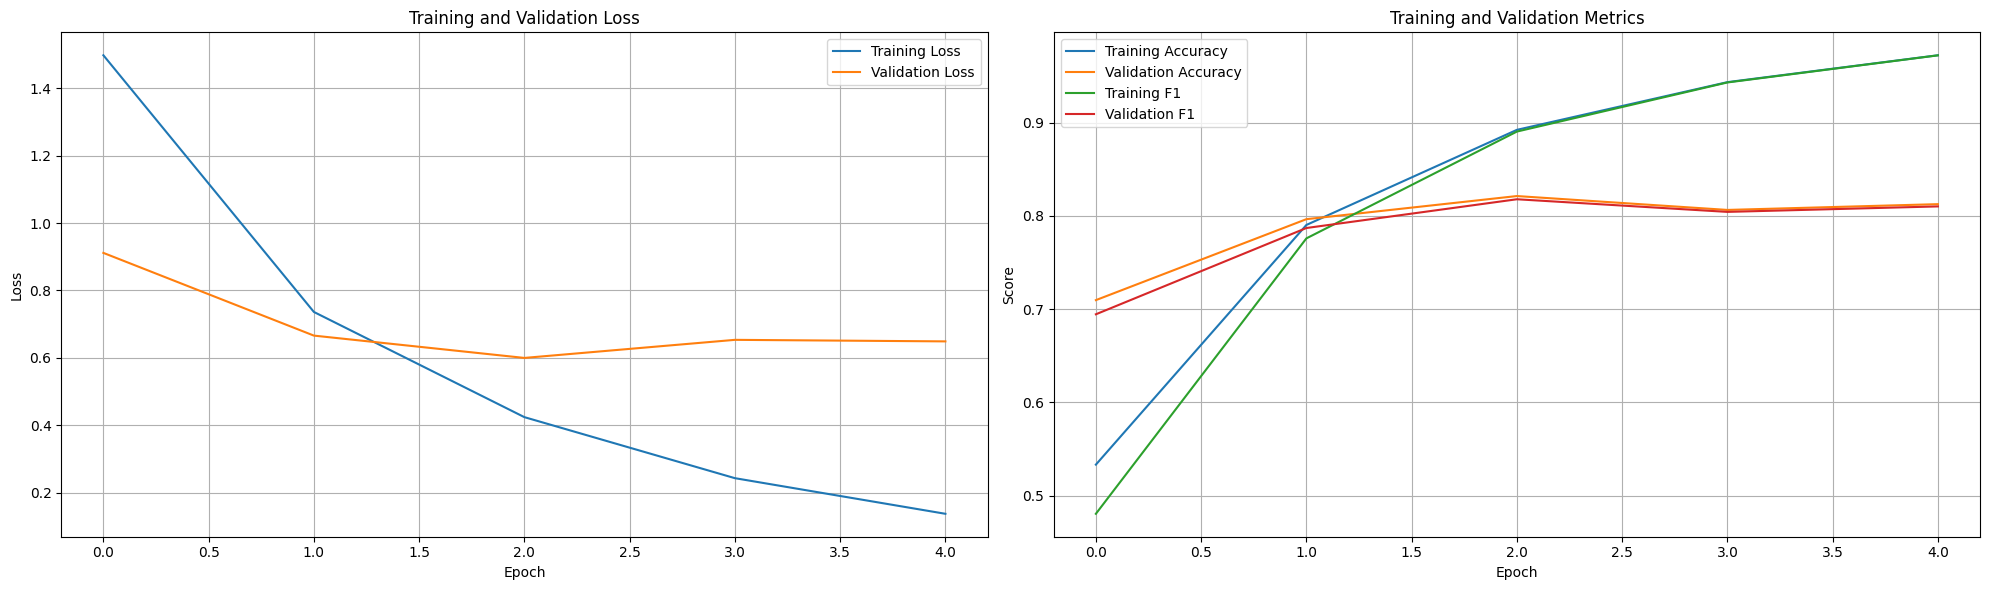

In [13]:
# Set up training parameters
num_epochs = 5
best_val_f1 = 0
best_model_state = None

# Training loop
print("Starting training...\n")
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print("-" * 30)

    # Track timing
    start_time = time.time()

    # Train model for one epoch
    train_loss, train_acc, train_prec, train_rec, train_f1 = train_epoch(
        model, train_loader, optimizer, criterion, device
    )

    # Evaluate model on validation set
    val_loss, val_acc, val_prec, val_rec, val_f1, class_metrics, _, _ = evaluate(
        model, val_loader, criterion, device
    )

    # Track statistics
    training_stats['train_loss'].append(train_loss)
    training_stats['train_acc'].append(train_acc)
    training_stats['train_f1'].append(train_f1)
    training_stats['val_loss'].append(val_loss)
    training_stats['val_acc'].append(val_acc)
    training_stats['val_f1'].append(val_f1)

    # Save best model
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_model_state = model.state_dict().copy()
        print("* New best model saved *")

    # Print epoch statistics
    elapsed_time = time.time() - start_time
    print(f"Epoch completed in {elapsed_time:.2f} seconds")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    # Print a few of the most challenging classes
    sorted_classes = sorted(class_metrics.items(), key=lambda x: x[1]['f1'])
    print("\nMost challenging classes (lowest F1 scores):")
    for class_name, metrics in sorted_classes[:3]:
        print(f"{class_name}: F1={metrics['f1']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}")

    print("\n")

# Load best model
model.load_state_dict(best_model_state)
print(f"Training complete! Best validation F1 score: {best_val_f1:.4f}")

# Plot training history
plot_training_history(training_stats)

# Detailed Model Evaluation and Visualizations

## Overview
This section enhances the interpretability of the model's performance by generating a series of informative visualizations. These plots go beyond aggregate metrics and focus on class-level performance, confusion patterns, and categorizing strengths and weaknesses across categories in the clinical text classification task.

## Step-by-Step Breakdown:

### 1. **Confusion Matrix Visualization**
- Generates a **non-normalized confusion matrix** using actual counts to help identify which classes are most frequently misclassified.
- Uses a perceptually uniform colormap (`viridis`) for improved visual clarity.
- Highlights class confusion patterns, particularly useful in multiclass tasks with potential overlaps in label meaning.

### 2. **Top Confused Class Pairs Table**
- Analyzes the confusion matrix to identify and display the **most frequently confused class pairs** (i.e., off-diagonal elements with high values).
- Displays the top 15 confusions along with their absolute counts and percentage of total predictions for the true class.
- Visualized as a clean table for easier interpretation, especially in clinical review settings.

### 3. **Per-Class Performance Bar Chart**
- Constructs a bar chart for **F1 Score, Precision, and Recall per class**.
- Sorts classes by F1 Score to highlight where the model performs best and worst.
- Displays sample counts alongside class names to contextualize performance with class representation.

### 4. **Performance Category Breakdown**
- Categorizes all classes into tiers based on their F1 Score:
  - *Excellent* (>0.9)
  - *Good* (0.8–0.9)
  - *Moderate* (0.7–0.8)
  - *Fair* (0.6–0.7)
  - *Poor* (<0.6)
- This tiering helps quickly assess where the model excels and where further data collection or modeling refinement may be needed.

## Practical Application:
These visualizations and breakdowns are critical for post-hoc model diagnostics, especially in sensitive domains like healthcare. By revealing *which* classes are consistently misclassified and *how well* each class is modeled, this analysis supports both explainability and practical deployment decisions. It also guides future data augmentation, re-labeling, or model fine-tuning efforts where necessary.


Generating improved visualizations of model performance...


<Figure size 1800x1600 with 0 Axes>

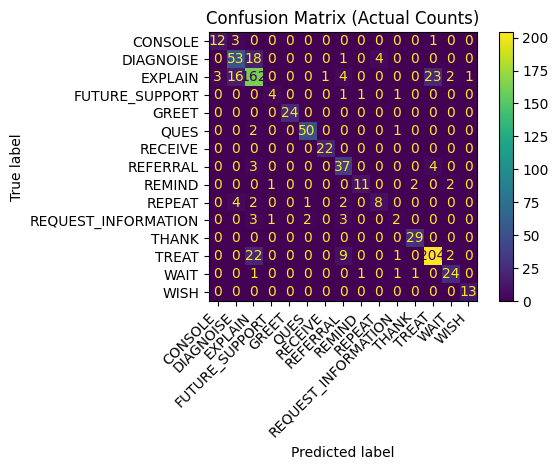

<Figure size 1200x1000 with 0 Axes>

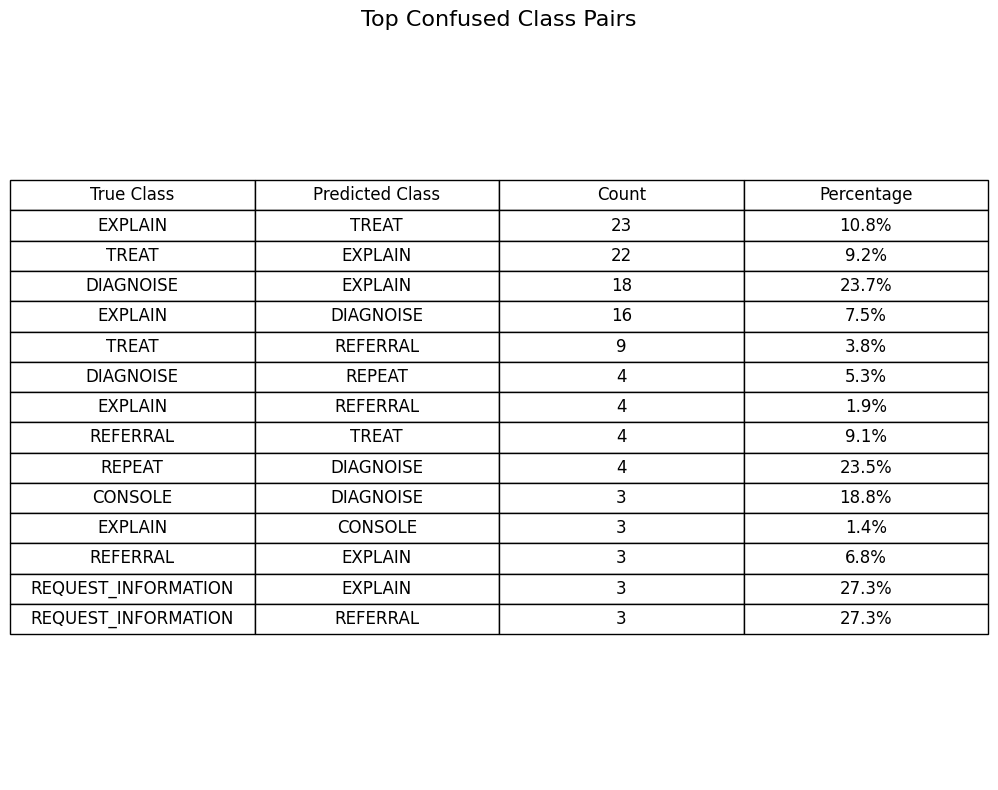

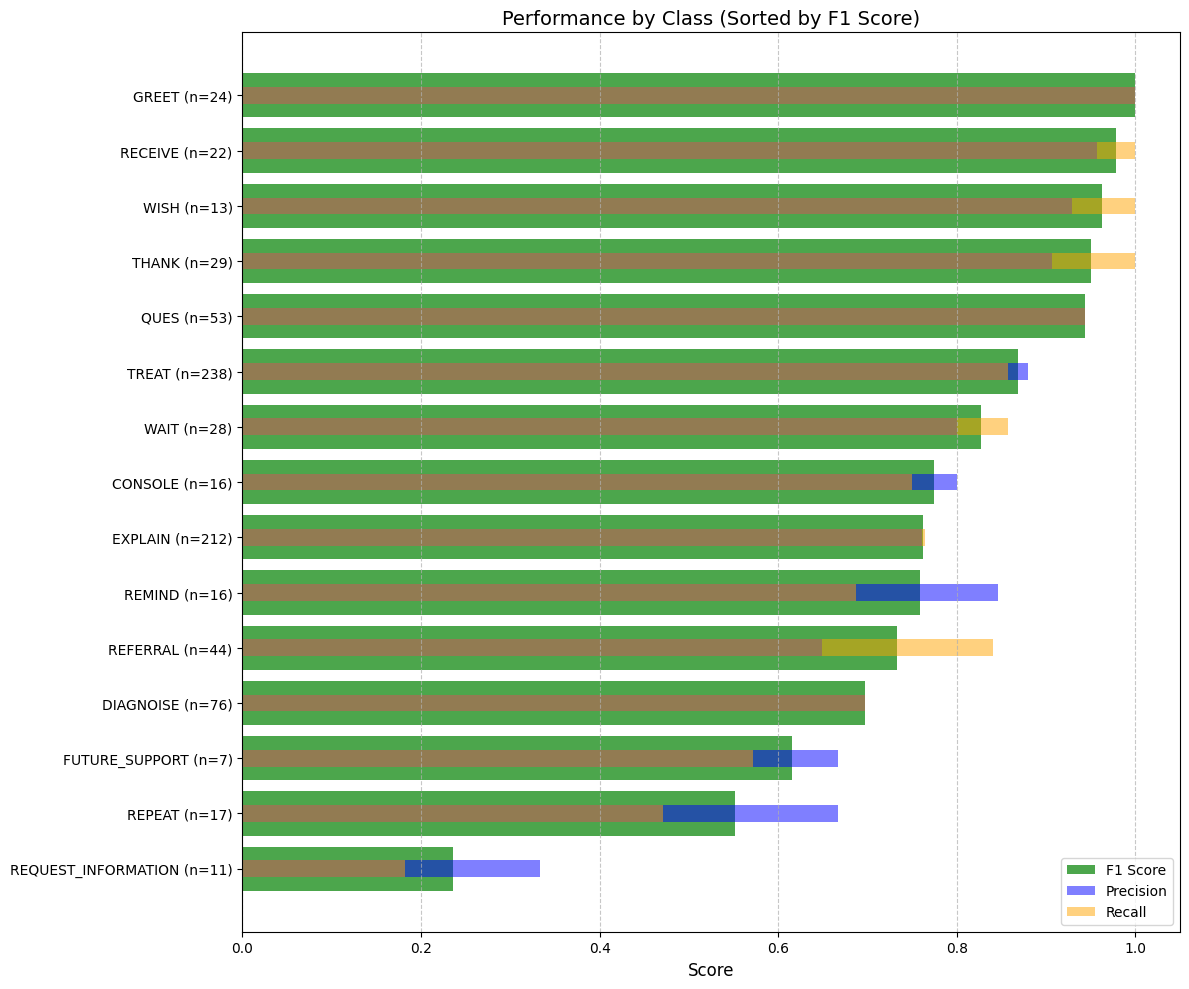


Performance Categories:
Excellent (F1 > 0.9): QUES, THANK, WISH, RECEIVE, GREET
Good (F1 0.8-0.9): WAIT, TREAT
Moderate (F1 0.7-0.8): REFERRAL, REMIND, EXPLAIN, CONSOLE
Fair (F1 0.6-0.7): FUTURE_SUPPORT, DIAGNOISE
Poor (F1 < 0.6): REQUEST_INFORMATION, REPEAT


In [15]:
# Improved detailed model evaluation with better visualizations
print("Generating improved visualizations of model performance...")

# Create a more readable confusion matrix - focus on problematic classes
plt.figure(figsize=(18, 16))
# Use a perceptually uniform colormap and adjust normalization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')  # Show actual counts instead of normalized values
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix (Actual Counts)')
plt.tight_layout()
plt.show()

# Create a heatmap of the most confused class pairs
plt.figure(figsize=(12, 10))
top_confused_classes = []
for i, class1 in enumerate(class_names):
    for j, class2 in enumerate(class_names):
        if i != j and cm[i, j] >= 3:  # Only show confusions with count >= 3
            top_confused_classes.append((i, j, cm[i, j]))

if top_confused_classes:
    top_confused_classes.sort(key=lambda x: x[2], reverse=True)
    confusion_df = pd.DataFrame([
        {
            'True Class': class_names[i],
            'Predicted Class': class_names[j],
            'Count': count,
            'Percentage': f"{count/np.sum(cm[i, :])*100:.1f}%"
        }
        for i, j, count in top_confused_classes[:15]  # Show top 15 confusions
    ])

    # Plot as a more readable table
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(
        cellText=confusion_df.values,
        colLabels=confusion_df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    plt.title('Top Confused Class Pairs', fontsize=16)
    plt.tight_layout()
    plt.show()

# Create an improved bar chart for per-class performance
# Sort by F1 score for better visualization
class_metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Sample Count': [pd.Series(y_val).value_counts().get(
        label_encoder.transform([cls])[0], 0) for cls in classes]
})

# Create a horizontal bar chart for better readability
plt.figure(figsize=(12, 10))
class_metrics_df = class_metrics_df.sort_values('F1 Score')

# Plot horizontal bars
plt.barh(class_metrics_df['Class'], class_metrics_df['F1 Score'], color='green', alpha=0.7, label='F1 Score')
plt.barh(class_metrics_df['Class'], class_metrics_df['Precision'], left=0, height=0.3, color='blue', alpha=0.5, label='Precision')
plt.barh(class_metrics_df['Class'], class_metrics_df['Recall'], left=0, height=-0.3, color='orange', alpha=0.5, label='Recall')

# Add count information to y-axis labels
labels = [f"{cls} (n={count})" for cls, count in zip(class_metrics_df['Class'], class_metrics_df['Sample Count'])]
plt.yticks(range(len(labels)), labels)

plt.xlim(0, 1.05)
plt.title('Performance by Class (Sorted by F1 Score)', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Create a categorized performance plot
performance_categories = {
    'Excellent (F1 > 0.9)': class_metrics_df[class_metrics_df['F1 Score'] > 0.9]['Class'].tolist(),
    'Good (F1 0.8-0.9)': class_metrics_df[(class_metrics_df['F1 Score'] > 0.8) & (class_metrics_df['F1 Score'] <= 0.9)]['Class'].tolist(),
    'Moderate (F1 0.7-0.8)': class_metrics_df[(class_metrics_df['F1 Score'] > 0.7) & (class_metrics_df['F1 Score'] <= 0.8)]['Class'].tolist(),
    'Fair (F1 0.6-0.7)': class_metrics_df[(class_metrics_df['F1 Score'] > 0.6) & (class_metrics_df['F1 Score'] <= 0.7)]['Class'].tolist(),
    'Poor (F1 < 0.6)': class_metrics_df[class_metrics_df['F1 Score'] <= 0.6]['Class'].tolist()
}

print("\nPerformance Categories:")
for category, classes in performance_categories.items():
    print(f"{category}: {', '.join(classes)}")

# Model Interpretability and Sample Predictions

## Overview
This section focuses on making the ClinicalBERT model's predictions more interpretable. It includes generating confidence-ranked predictions, reviewing model behavior across categories, and summarizing results visually and textually. These outputs help both technical stakeholders and domain experts evaluate model trustworthiness and performance on a qualitative level.

## Step-by-Step Breakdown:

### 1. **Prediction Function with Confidence Scores**
- The `predict_with_confidence` function:
  - Tokenizes input text.
  - Runs inference using the trained model.
  - Computes class probabilities using `softmax`.
  - Extracts and returns the top 3 predicted class names with associated probabilities.
- This supports transparency by showing *how confident* the model is in its predictions.

### 2. **Generate Per-Class Sample Predictions**
- For each class in the validation set:
  - Select one representative example.
  - Generate predictions using the model.
  - Store the raw text and top 3 predicted labels with confidence scores.
- This gives a snapshot of how the model handles each category, making error patterns more interpretable.

### 3. **Console Output for Review**
- Prints sample texts, true labels, and top predictions in a human-readable format.
- Helps identify cases where the model’s top choices are semantically close but incorrect.

### 4. **Visual Summary Table**
- Constructs a clean table summarizing:
  - True category
  - Truncated example text
  - Top and second prediction with confidence
- Displayed using `matplotlib.table` for easy review in a Jupyter environment or presentation.

### 5. **Model Summary for Stakeholders**
- Outputs a high-level summary suitable for final presentation or reporting:
  - Model type and number of categories.
  - Training/validation set sizes.
  - Final accuracy and F1 score.
  - Class performance tiers (e.g., Excellent, Good, Poor).
  - Most challenging categories (lowest F1).
  - Top confusion pairs (true vs. predicted mismatch with frequency).

## Practical Application:
This interpretability section brings clarity to model decisions by showcasing examples, surfacing confidence levels, and exposing both strengths and weaknesses by class. It bridges the gap between quantitative evaluation and real-world deployment readiness—especially critical in domains like clinical text classification where decision traceability and stakeholder trust are paramount.


Generating sample predictions and feature importance...

--- Sample Predictions by Category ---

Category: CONSOLE
Text: regarding the issue of the lateral lymph node i think it isn t too concerning
Predictions:
  - DIAGNOISE: 0.8441 (84.4%)
  - CONSOLE: 0.0599 (6.0%)
  - EXPLAIN: 0.0378 (3.8%)

Category: DIAGNOISE
Text: from your information i did not find any relevant medical conditions in your medical history and the fact that you also engaged in mountain climbing a physically demanding activity indicates that you are generally in good health.
Predictions:
  - DIAGNOISE: 0.6917 (69.2%)
  - REPEAT: 0.2414 (24.1%)
  - EXPLAIN: 0.0158 (1.6%)

Category: EXPLAIN
Text: topical ointments usually take effect in about two weeks.
Predictions:
  - TREAT: 0.9953 (99.5%)
  - EXPLAIN: 0.0012 (0.1%)
  - REFERRAL: 0.0010 (0.1%)

Category: FUTURE_SUPPORT
Text: these are my suggestions for now but please feel free to contact me if you need further assistance.
Predictions:
  - FUTURE_SUPPORT: 0.7917 (

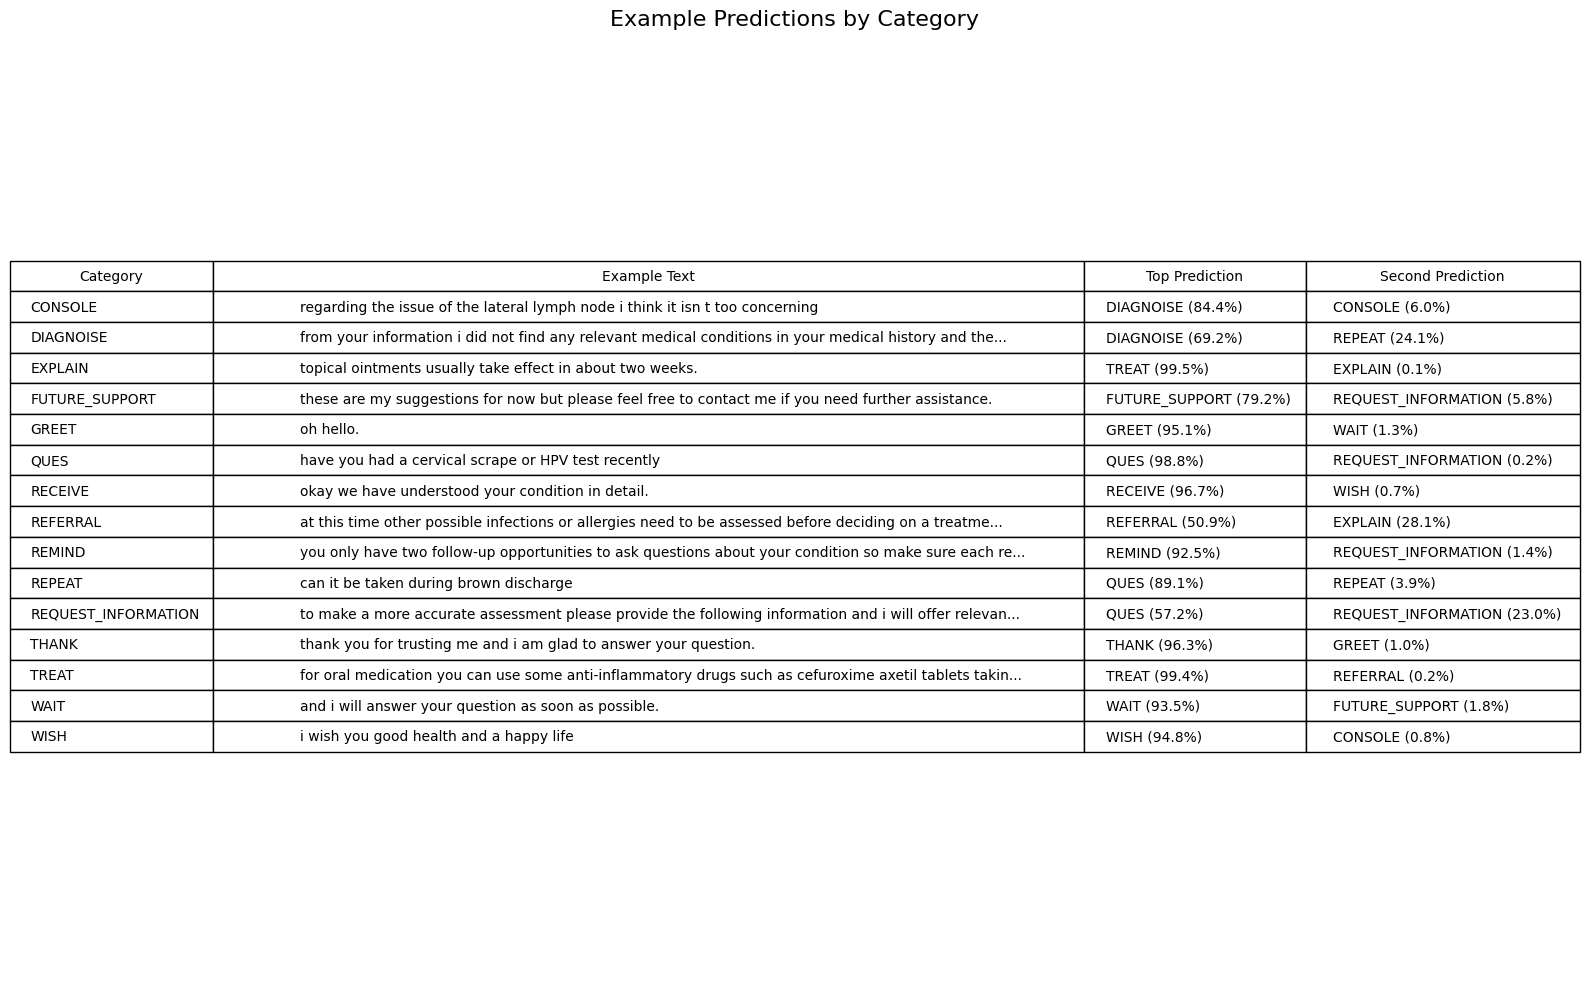


--- Model Summary for Presentation ---
Model: ClinicalBERT fine-tuned for medical conversation classification
Classes: 15 categories based on Social Support Theory
Training samples: 3224
Validation samples: 806
Overall accuracy: 0.8127 (81.3%)
Overall F1 score: 0.8102 (81.0%)

Performance by category level:
- Excellent (F1 > 0.9): QUES, THANK, WISH, RECEIVE, GREET
- Good (F1 0.8-0.9): WAIT, TREAT
- Moderate (F1 0.7-0.8): REFERRAL, REMIND, EXPLAIN, CONSOLE
- Fair (F1 0.6-0.7): FUTURE_SUPPORT, DIAGNOISE
- Poor (F1 < 0.6): REQUEST_INFORMATION, REPEAT

Most challenging categories:
- REQUEST_INFORMATION: F1=0.2353, Count in validation=11
- REPEAT: F1=0.5517, Count in validation=17
- FUTURE_SUPPORT: F1=0.6154, Count in validation=7

Most confused category pairs:
- EXPLAIN misclassified as TREAT: 23 instances (10.8%)
- TREAT misclassified as EXPLAIN: 22 instances (9.2%)
- DIAGNOISE misclassified as EXPLAIN: 18 instances (23.7%)


In [16]:
# Model interpretability and sample predictions
print("Generating sample predictions and feature importance...")

# Function to get predictions with confidence scores
def predict_with_confidence(model, tokenizer, text, device):
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=128,
        return_tensors='pt'
    )

    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)

    # Get top 3 predictions
    top_probs, top_indices = torch.topk(probs, k=3, dim=1)

    # Convert to class names
    predictions = []
    for i in range(top_indices.shape[1]):
        class_idx = top_indices[0, i].item()
        class_name = label_encoder.inverse_transform([class_idx])[0]
        probability = top_probs[0, i].item()
        predictions.append((class_name, probability))

    return predictions

# Get one sample from each class in validation set
sample_predictions = {}
for class_name in class_names:
    # Find indices where true label matches this class
    class_idx = label_encoder.transform([class_name])[0]
    indices = [i for i, label in enumerate(y_val) if label == class_idx]

    if indices:
        # Get a sample text
        sample_idx = indices[0]
        sample_text = X_val.iloc[sample_idx]

        # Get predictions
        predictions = predict_with_confidence(model, tokenizer, sample_text, device)

        # Store sample and predictions
        sample_predictions[class_name] = {
            'text': sample_text,
            'predictions': predictions
        }

# Display sample predictions
print("\n--- Sample Predictions by Category ---")
for class_name, data in sample_predictions.items():
    print(f"\nCategory: {class_name}")
    print(f"Text: {data['text']}")
    print("Predictions:")
    for pred_class, prob in data['predictions']:
        print(f"  - {pred_class}: {prob:.4f} ({prob*100:.1f}%)")

# Create a summary table of model predictions
prediction_examples = pd.DataFrame([
    {
        'Category': class_name,
        'Example Text': data['text'][:100] + ('...' if len(data['text']) > 100 else ''),
        'Top Prediction': f"{data['predictions'][0][0]} ({data['predictions'][0][1]*100:.1f}%)",
        'Second Prediction': f"{data['predictions'][1][0]} ({data['predictions'][1][1]*100:.1f}%)" if len(data['predictions']) > 1 else "-"
    }
    for class_name, data in sample_predictions.items()
])

# Display as a visualization table
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=prediction_examples.values,
    colLabels=prediction_examples.columns,
    loc='center',
    cellLoc='left'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
table.auto_set_column_width(col=list(range(len(prediction_examples.columns))))
plt.title('Example Predictions by Category', fontsize=16)
plt.tight_layout()
plt.show()

# Prepare model summary for presentation
print("\n--- Model Summary for Presentation ---")
print(f"Model: ClinicalBERT fine-tuned for medical conversation classification")
print(f"Classes: {len(class_names)} categories based on Social Support Theory")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Overall accuracy: {val_acc:.4f} ({val_acc*100:.1f}%)")
print(f"Overall F1 score: {val_f1:.4f} ({val_f1*100:.1f}%)")
print("\nPerformance by category level:")
for category, classes in performance_categories.items():
    print(f"- {category}: {', '.join(classes)}")
print("\nMost challenging categories:")
bottom_classes = class_metrics_df.nsmallest(3, 'F1 Score')
for _, row in bottom_classes.iterrows():
    print(f"- {row['Class']}: F1={row['F1 Score']:.4f}, Count in validation={row['Sample Count']}")
print("\nMost confused category pairs:")
for true_class, pred_class, count, percent in top_confusions[:3]:
    print(f"- {true_class} misclassified as {pred_class}: {count} instances ({percent:.1%})")

# Final Model Saving and Inference Pipeline

## Overview
This section finalizes the trained ClinicalBERT model for future use by saving all necessary components and preparing a robust test-time prediction function. It ensures the model and preprocessing pipeline are fully portable, making them usable for deployment or batch evaluation on unseen test data.

## Step-by-Step Breakdown:

### 1. **Create Directory for Artifacts**
- A `model_artifacts/` directory is created to store all model-related files, ensuring a clean and reusable structure for inference or deployment.

### 2. **Save Components**
- **Label Encoder**: Encoded class labels are saved using `joblib` for consistent decoding during inference.
- **Tokenizer**: The pretrained tokenizer is saved using Hugging Face’s `save_pretrained()` method.
- **Model Weights**: The trained model parameters (`state_dict`) are saved separately to allow reloading without retraining.
- **Class Weights**: Stored to potentially re-use for weighted evaluation in the future.
- **Performance Summary File**: A human-readable `.txt` file is created to log key metrics (accuracy, precision, recall, F1 score) and per-class performance, useful for audits and model documentation.

### 3. **Test-Time Prediction Function – `test_set_predict()`**
- This function loads the saved model, tokenizer, and label encoder to perform inference on a list of new text samples.
- Text is preprocessed using the same function from training.
- The model predicts a class label and confidence score for each sample.
- Returns a structured DataFrame with:
  - Input text
  - Predicted class
  - Confidence score
  - Probability distribution over all classes

### 4. **Sanity Check on Inference**
- A set of three example inputs is passed to the `test_set_predict()` function.
- The predictions are printed to confirm that the pipeline works end-to-end on unseen data.

## Practical Application:
This setup ensures that the model is not only trained and evaluated but also *deployable*. By saving preprocessing steps, model weights, and metadata, this pipeline supports reproducibility and consistent inference on real-world or hold-out datasets. The modular prediction function can be easily integrated into web apps, batch scoring systems, or clinical decision support tools.


In [18]:
# Final model preparation and test set pipeline
import joblib
import os

# Create a directory for model artifacts if it doesn't exist
if not os.path.exists('model_artifacts'):
    os.makedirs('model_artifacts')

# Save the model and all necessary components
print("Saving model artifacts for future test set evaluation...")

# Save label encoder
joblib.dump(label_encoder, 'model_artifacts/label_encoder.pkl')
print("✓ Label encoder saved")

# Save the tokenizer configuration
tokenizer.save_pretrained('model_artifacts/tokenizer')
print("✓ Tokenizer saved")

# Save the model weights
torch.save(model.state_dict(), 'model_artifacts/clinical_bert_model.pt')
print("✓ Model weights saved")

# Save class weights for weighted metrics
torch.save(class_weights, 'model_artifacts/class_weights.pt')
print("✓ Class weights saved")

# Create a performance summary file
with open('model_artifacts/performance_summary.txt', 'w') as f:
    f.write("ClinicalBERT Medical Conversation Classifier\n")
    f.write("=" * 45 + "\n\n")
    f.write(f"Training samples: {len(X_train)}\n")
    f.write(f"Validation samples: {len(X_val)}\n")
    f.write(f"Number of classes: {len(class_names)}\n\n")
    f.write("Performance Metrics:\n")
    f.write(f"- Accuracy: {val_acc:.4f}\n")
    f.write(f"- Precision (weighted): {val_prec:.4f}\n")
    f.write(f"- Recall (weighted): {val_rec:.4f}\n")
    f.write(f"- F1 Score (weighted): {val_f1:.4f}\n\n")
    f.write("Per-Class Performance:\n")
    for cls, metrics in sorted(class_metrics.items(), key=lambda x: x[1]['f1'], reverse=True):
        f.write(f"- {cls}: F1={metrics['f1']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}\n")

print("✓ Performance summary saved")

# Create a test inference function for the upcoming test set
def test_set_predict(text_list, model_dir='model_artifacts'):
    """
    Function to make predictions on new test data.

    Parameters:
    -----------
    text_list : list
        List of text samples to classify
    model_dir : str
        Directory where model artifacts are saved

    Returns:
    --------
    DataFrame with predictions and confidence scores
    """
    # Load model components
    label_encoder = joblib.load(f'{model_dir}/label_encoder.pkl')
    tokenizer = AutoTokenizer.from_pretrained(f'{model_dir}/tokenizer')

    # Initialize model
    model = AutoModelForSequenceClassification.from_pretrained(
        "emilyalsentzer/Bio_ClinicalBERT",
        num_labels=len(label_encoder.classes_)
    )

    # Load saved weights
    model.load_state_dict(torch.load(f'{model_dir}/clinical_bert_model.pt'))
    model.to(device)
    model.eval()

    results = []

    # Process each text
    for text in text_list:
        # Preprocess text using the same function we used during training
        processed_text = preprocess_medical_text(text)

        # Tokenize
        encoding = tokenizer(
            processed_text,
            truncation=True,
            padding='max_length',
            max_length=128,
            return_tensors='pt'
        )

        # Move tensors to device
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Get probabilities
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)[0]
        pred_idx = torch.argmax(probs).item()
        pred_class = label_encoder.inverse_transform([pred_idx])[0]
        confidence = probs[pred_idx].item()

        # Store results
        results.append({
            'text': text,
            'predicted_class': pred_class,
            'confidence': confidence,
            'class_probabilities': {
                label_encoder.inverse_transform([i])[0]: prob.item()
                for i, prob in enumerate(probs)
            }
        })

    return pd.DataFrame(results)

# Test the inference pipeline with a few examples
test_examples = [
    "Hello, how can I help you today?",
    "Based on your symptoms, I believe you have a respiratory infection.",
    "Take the medication twice daily with food."
]

test_results = test_set_predict(test_examples)
print("\nTest of inference pipeline:")
for i, row in test_results.iterrows():
    print(f"Example {i+1}:")
    print(f"Text: {row['text']}")
    print(f"Prediction: {row['predicted_class']} (Confidence: {row['confidence']:.2%})")
    print()


Saving model artifacts for future test set evaluation...
✓ Label encoder saved
✓ Tokenizer saved
✓ Model weights saved
✓ Class weights saved
✓ Performance summary saved


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Test of inference pipeline:
Example 1:
Text: Hello, how can I help you today?
Prediction: QUES (Confidence: 98.49%)

Example 2:
Text: Based on your symptoms, I believe you have a respiratory infection.
Prediction: DIAGNOISE (Confidence: 94.75%)

Example 3:
Text: Take the medication twice daily with food.
Prediction: TREAT (Confidence: 99.49%)



# Macro-Averaged Evaluation Metrics for Spreadsheet Reporting

## Overview
This section calculates **macro-averaged performance metrics** (precision, recall, F1-score) for the validation set predictions and formats them for inclusion in a results spreadsheet. Macro-averaging treats each class equally, making it useful for assessing model performance in **imbalanced multiclass settings**, such as clinical classification tasks.

## Step-by-Step Breakdown:

### 1. **Calculate Macro-Averaged Metrics**
- Use `precision_recall_fscore_support` from `sklearn.metrics` with `average='macro'`:
  - **Precision**: Average of per-class precision scores.
  - **Recall**: Average of per-class recall scores.
  - **F1-Score**: Average of per-class F1 scores.
- These metrics give an equal-weighted view across all classes, independent of support (class frequency).

### 2. **Format for Spreadsheet Output**
- Print the key metrics using percentage formatting for clarity in presentations and reporting.
- Include previously computed overall **accuracy** (`val_acc`), which represents total correct predictions out of all validation samples.

### 3. **Create Structured Output Dictionary**
- Prepare a clean dictionary named `entry` to hold:
  - Sampling and preprocessing strategy.
  - Model configuration (learning rate, batch size, epochs).
  - All macro-averaged and overall metrics.
- This format supports easy conversion into a DataFrame or CSV row for logging or comparative analysis across different experiments.

## Practical Application:
Macro-averaged metrics are particularly valuable when your dataset contains rare but important classes, as they prevent dominant classes from skewing results. This block enables standardized performance tracking across experiments, which is essential for reproducibility and comparative reporting in research or production settings.


In [20]:
# Calculate macro-averaged metrics for the spreadsheet
from sklearn.metrics import precision_recall_fscore_support

# Using our existing model predictions on the validation set
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
    true_labels, preds, average='macro'
)

# Format for the spreadsheet
print("ClinicalBERT Model Metrics for Spreadsheet:")
print(f"Accuracy: {val_acc:.2%}")
print(f"Precision (Macro Avg): {macro_precision:.2%}")
print(f"Recall (Macro Avg): {macro_recall:.2%}")
print(f"F1-Score (Macro Avg): {macro_f1:.2%}")

# Create entry for spreadsheet
entry = {
    'Sampling Type': 'Class Weights',
    'Pre-Processing Method': 'Domain-Specific Tokenization',
    'Model Name': 'ClinicalBERT (lr=2e-5, bs=16, e=5)',
    'Accuracy': f"{val_acc:.2%}",
    'Precision (Macro Avg)': f"{macro_precision:.2%}",
    'Recall (Macro Avg)': f"{macro_recall:.2%}",
    'F1-Score (Macro Avg)': f"{macro_f1:.2%}"
}


ClinicalBERT Model Metrics for Spreadsheet:
Accuracy: 81.27%
Precision (Macro Avg): 78.89%
Recall (Macro Avg): 77.48%
F1-Score (Macro Avg): 77.72%
